In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
### Data Standardization and Modeling with K-Means and PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
### Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() ## this is for styling

In [2]:
df = pd.read_csv('base_promotoresV2.csv')
df

,Volume,Categoria,Cliente,Código Cliente,Cnpj/Cpf Cliente,Regional,Descrição Segmentacao,Canal de Vendas,faturado,vol_medio_6,...,%PO,%CONDENSADO,%CREME,%QUEIJO,SKU_COUNT,DATA_COUNT,NF_COUNT,ticket_data,ticket_nf,promotor
0,1286916.00,LEITE UHT,ANCORA DISTRIBUIDORA DE ALIMENTOS L,1024744,3879760000966,REG I (CE/CAP/AS),KEY ACCOUNT REGIONAL,Auto Serv. Regional,6025642.32,330051.471667,...,0.038561,0.044107,0.025946,0.032866,70.333333,88,297,173558.391818,51424.708687,0
1,1150560.00,LEITE UHT,ARMAZEM MATEUS SA,1077724,23439441003539,REG IV (MA),OUTROS,Auto Serv. Regional,4840716.00,200184.000000,...,0.000000,0.000000,0.042081,0.000000,3.166667,24,48,225652.250000,112826.125000,0
2,1106640.00,LEITE UHT,SUPERMERCADO COMETA EIRELI,1095987,6887668003102,REG I (CE/CAP/AS),KEY ACCOUNT REGIONAL,Auto Serv. Regional,5160830.40,231497.500000,...,0.023136,0.096746,0.068230,0.000000,8.500000,48,81,188927.362500,111956.955556,0
3,945540.00,LEITE UHT,BOMPRECO SUPERMERC DO NORDESTE LTDA,1024361,13004510025840,KEY ACCOUNT GERAL,KEY ACCOUNT NACIONAL,Auto Serv. Nacional,4227696.00,283636.936667,...,0.000000,0.031585,0.018854,0.000000,57.000000,64,205,190285.876562,59406.322439,0
4,844560.00,LEITE UHT,BOMPRECO BAHIA SUPERMERCADOS LTDA,1006309,97422620000150,KEY ACCOUNT GERAL,KEY ACCOUNT NACIONAL,Auto Serv. Nacional,3740544.00,203530.675000,...,0.000000,0.038165,0.010303,0.000000,5.666667,39,86,151714.557692,68800.787791,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213673,0.15,IOGURTE,JOSE GOMES DO VALE JUNIOR 017273393,1107473,31914519000109,REG I (CE/INT/SUL),TRADICIONAL 600,Pequeno varejo,3.02,64.325000,...,0.023319,0.000000,0.042493,0.000000,3.000000,8,9,306.873750,272.776667,0
213674,0.15,IOGURTE,MARIA LUCIA BARBOSA LEMOS ME,1082015,11759784000152,REG I (CE/INT/SUL),TRADICIONAL 600,Pequeno varejo,3.02,28.240000,...,0.106232,0.125885,0.095609,0.000000,3.500000,6,6,301.648333,301.648333,0
213675,0.14,IOGURTE,PADARIA BACUTTE ATHENAS EIRELI,1062293,23679005000198,REG IV (MA),PADARIA,Pequeno varejo,2.31,8.556667,...,0.000000,0.000000,0.000000,0.000000,4.500000,8,8,186.212500,186.212500,0
213676,0.14,IOGURTE,SEVERINA AVELINO DA SILVA FRANCA 02,1126143,28370597000185,REG VII (PB),TRADICIONAL 600,Pequeno varejo,2.43,23.252500,...,0.186360,0.127406,0.077411,0.000000,2.833333,6,6,306.723333,306.723333,0


In [3]:
#
df_prod = df.rename(columns={'Código Cliente':'Cliente_cod'})
df_prod = df_prod.rename(columns={'Canal de Vendas':'Canal_de_vendas'})
df_prod = df_prod.rename(columns={'Descrição Segmentacao':'Desc_seg'})
df_prod['Cliente_cod'] = df_prod['Cliente_cod'].astype(str)
#df_prod = df_prod[(df_prod.Canal_de_vendas=='Pequeno varejo') | (df_prod.Canal_de_vendas=='Atacado Regional') | (df_prod.Canal_de_vendas=='Auto Serv. Regional')]
#df_prod = df_prod[(df_prod.Desc_seg=='TRADICIONAL')]
df_prod = df_prod[(df_prod.Desc_seg=='PADARIA') | (df_prod.Desc_seg=='KEY ACCOUNT REGIONAL') | (df_prod.Desc_seg=='KEY ACCOUNT NACIONAL') 
                  | (df_prod.Desc_seg=='CASH CARRY') | (df_prod.Desc_seg=='AUTO SERVIÇO DIRETO') | (df_prod.Desc_seg=='AUTO SERVIÇO DE ROTA') 
                  | (df_prod.Desc_seg=='ATACADO DISTRIBUIDOR')]
df_prod = df_prod[(df_prod.Regional!='PRONTA ENTREGA')]
df_prod = df_prod[(df_prod.Categoria!='LEITE PASTEURIZADO')]
#df_prod = df_prod[['Cliente_cod','Volume','promotor','vol_medio_6','Linha'
#                  ,'SKU_COUNT','DATA_COUNT','ticket_data']]
df_prod = df_prod[['Cliente_cod','Volume','promotor','vol_medio_6','Linha','%UHT','%PO','%CONDENSADO','%CREME','%QUEIJO'
                  ,'SKU_COUNT','DATA_COUNT','ticket_data']]
df_prod = df_prod.rename(columns={'Cliente_cod':'Cliente'})
df_prod

,Cliente,Volume,promotor,vol_medio_6,Linha,%UHT,%PO,%CONDENSADO,%CREME,%QUEIJO,SKU_COUNT,DATA_COUNT,ticket_data
0,1024744,1286916.00,0,330051.471667,Seco,0.649856,0.038561,0.044107,0.025946,0.032866,70.333333,88,173558.391818
2,1095987,1106640.00,0,231497.500000,Seco,0.796726,0.023136,0.096746,0.068230,0.000000,8.500000,48,188927.362500
3,1024361,945540.00,0,283636.936667,Seco,0.649104,0.000000,0.031585,0.018854,0.000000,57.000000,64,190285.876562
4,1006309,844560.00,0,203530.675000,Seco,0.912098,0.000000,0.038165,0.010303,0.000000,5.666667,39,151714.557692
5,1006250,616080.00,0,133579.737500,Seco,0.777663,0.093760,0.068463,0.036787,0.000000,7.166667,36,176051.105000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
213635,1100772,0.17,0,212.370833,Frio,0.781652,0.000000,0.058589,0.046617,0.000000,5.666667,21,383.066667
213636,1006671,0.17,0,171.821667,Frio,0.721678,0.019400,0.000000,0.000000,0.000000,9.833333,15,543.335333
213665,1119764,0.17,0,609.640000,Frio,0.295256,0.000000,0.577300,0.126960,0.000000,3.500000,23,1871.456957
213671,1094807,0.15,0,164.920000,Frio,0.509338,0.004042,0.000000,0.000000,0.158835,4.333333,11,916.045455


In [4]:
#df_stage = df_prod.pivot_table(
#    values=['Volume'], index=['Cliente','promotor','vol_medio_6'
#                  ,'SKU_COUNT','DATA_COUNT'], columns='Linha',
#    fill_value=0, aggfunc='sum')
df_stage = df_prod.pivot_table(
    values=['Volume'], index=['Cliente','promotor','vol_medio_6','%UHT','%PO','%CONDENSADO','%CREME','%QUEIJO'
                  ,'SKU_COUNT','DATA_COUNT'], columns='Linha',
    fill_value=0, aggfunc='sum')
df_stage.columns = ["_".join(tup) for tup in df_stage.columns.to_flat_index()]
df_stage = df_stage.reset_index()
df_stage = df_stage.set_index('Cliente')
for x in ['vol_medio_6']:
    q75,q25 = np.percentile(df_stage.loc[:,x],[95,5])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df_stage.loc[df_stage[x] < min,x] = np.nan
    df_stage.loc[df_stage[x] > max,x] = np.nan

for x in ['Volume_Frio']:
    q75,q25 = np.percentile(df_stage.loc[:,x],[95,5])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df_stage.loc[df_stage[x] < min,x] = np.nan
    df_stage.loc[df_stage[x] > max,x] = np.nan
    
df_stage = df_stage.dropna()

In [5]:
df_stage.iloc[:,10:12] = df_stage.iloc[:,10:12]/6
df_stage.iloc[:,8:9] = df_stage.iloc[:,8:9]/6
df_stage['ticket'] = df_stage['vol_medio_6']/df_stage['DATA_COUNT']

df_stage

,promotor,vol_medio_6,%UHT,%PO,%CONDENSADO,%CREME,%QUEIJO,SKU_COUNT,DATA_COUNT,Volume_Frio,Volume_Seco,ticket
Cliente,,,,,,,,,,,,
1000214,0,129.732500,0.369992,0.015416,0.077641,0.013875,0.174731,16.333333,4.000000,232.32,91.012500,32.433125
1000317,0,108.898333,0.459144,0.000000,0.000000,0.000306,0.000000,7.000000,2.000000,314.95,56.406667,54.449167
1000525,0,139.830833,0.715150,0.009535,0.012712,0.013111,0.000000,7.500000,2.166667,124.00,119.164167,64.537308
1003653,0,906.791667,0.055139,0.007811,0.005227,0.004963,0.001084,21.000000,6.166667,5001.41,73.223333,147.047297
1005278,0,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.833333,1.000000,0.00,100.000000,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
1250162,0,7.224167,0.000000,0.322990,0.082016,0.009228,0.000000,2.666667,0.166667,16.03,4.552500,43.345000
1250372,0,1200.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.166667,0.00,1200.000000,7200.000000
1250474,0,7.150833,0.279688,0.000000,0.248572,0.004661,0.000000,1.166667,0.166667,2.40,6.750833,42.905000


In [6]:
scaler = StandardScaler()
df_std = scaler.fit_transform(df_stage)
df_std = pd.DataFrame(data = df_std,columns = df_stage.columns)
df_std

,promotor,vol_medio_6,%UHT,%PO,%CONDENSADO,%CREME,%QUEIJO,SKU_COUNT,DATA_COUNT,Volume_Frio,Volume_Seco,ticket
0,-0.525904,-0.441755,-0.291186,-0.280815,0.256878,-0.405553,5.353202,-0.146447,0.089571,-0.462087,-0.379245,-0.261523
1,-0.525904,-0.448555,0.017791,-0.419562,-0.640024,-0.608381,-0.134005,-0.697215,-0.439595,-0.438022,-0.392103,-0.250091
2,-0.525904,-0.438460,0.905043,-0.333744,-0.493178,-0.416968,-0.134005,-0.667710,-0.395498,-0.493633,-0.368785,-0.244853
3,-0.525904,-0.188158,-1.382386,-0.349259,-0.579639,-0.538775,-0.099950,0.128937,0.662834,0.926839,-0.385855,-0.202009
4,-0.525904,-0.451459,-1.573485,-0.419562,-0.640024,-0.612956,-0.134005,-1.061116,-0.704178,-0.529746,-0.375906,-0.226439
...,...,...,...,...,...,...,...,...,...,...,...,...
7717,-0.525904,-0.481737,-1.573485,2.487348,0.307428,-0.475009,-0.134005,-0.952929,-0.924664,-0.525078,-0.411370,-0.255857
7718,-0.525904,-0.092468,1.892261,-0.419562,-0.640024,-0.612956,-0.134005,-1.090621,-0.924664,-0.529746,0.032807,3.460296
7719,-0.525904,-0.481760,-0.604159,-0.419562,2.231480,-0.543275,-0.134005,-1.041446,-0.924664,-0.529047,-0.410553,-0.256086
7720,-0.525904,-0.479663,-1.573485,-0.419562,2.384819,1.368893,-0.134005,-0.972600,-0.924664,-0.517389,-0.410644,-0.236066


In [7]:
wcss = []
for i in range(1,11):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    #kmeans_pca.fit(df_std)
    kmeans_pca.fit(df_stage)
    wcss.append(kmeans_pca.inertia_)

kmeans_pca.explained_variance_ratio_

AttributeError: 'KMeans' object has no attribute 'explained_variance_ratio_'

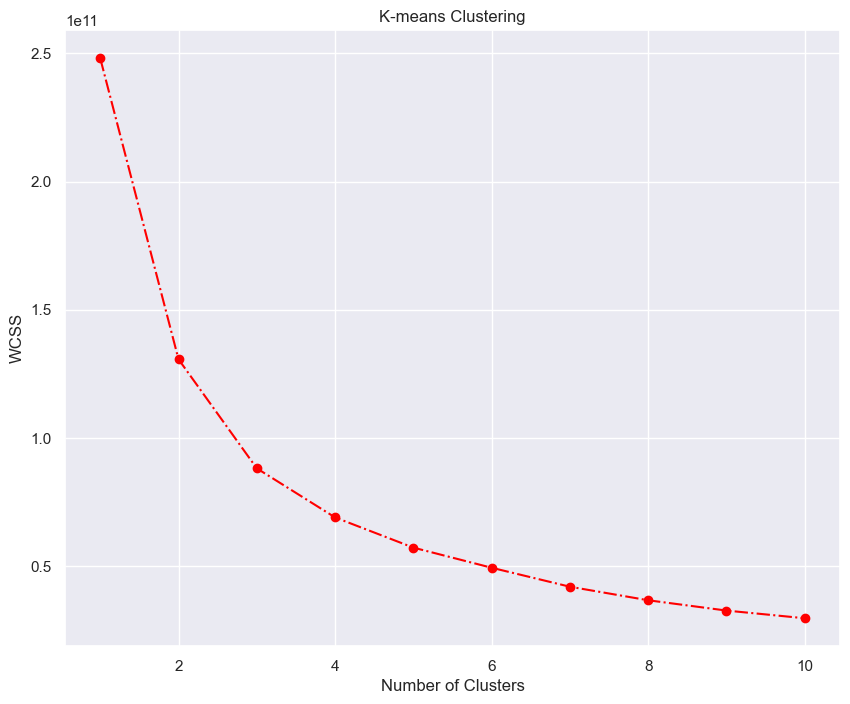

In [40]:
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '-.',color='red')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.show()

In [41]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)

In [42]:
kmeans.fit(df_std)
#kmeans.fit(df_stage)

KMeans(n_clusters=5, random_state=42)

In [43]:
df_segm_kmeans= df_std.copy()
#df_segm_kmeans= df_stage.copy()
df_segm_kmeans['Segment K-means'] = kmeans.labels_

In [44]:
df_segm_analysis = df_segm_kmeans.groupby(['Segment K-means']).mean()
df_segm_analysis


,promotor,vol_medio_6,%UHT,%PO,%CONDENSADO,%CREME,%QUEIJO,SKU_COUNT,DATA_COUNT,Volume_Frio,Volume_Seco,ticket
Segment K-means,,,,,,,,,,,,
0,-0.367275,-0.355262,-0.783110,0.207857,-0.149824,-0.104809,0.122224,-0.131594,-0.227822,-0.271529,-0.325023,-0.198602
1,1.519209,0.609617,-0.291966,-0.144576,-0.286463,-0.246453,-0.000496,1.466503,1.320648,1.258521,0.325820,-0.021217
2,-0.306505,-0.380753,-0.616211,0.166402,2.424119,2.222276,-0.093452,-0.821290,-0.581130,-0.489603,-0.303952,-0.137493
3,0.613717,4.597739,0.781412,0.214840,0.007518,-0.051921,-0.094846,0.388668,0.239667,1.897970,4.824566,3.621651
4,-0.393020,-0.241243,0.893763,-0.161391,-0.157149,-0.176705,-0.085751,-0.471245,-0.346573,-0.413830,-0.161673,-0.050034


C:\Users\josesugahara\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


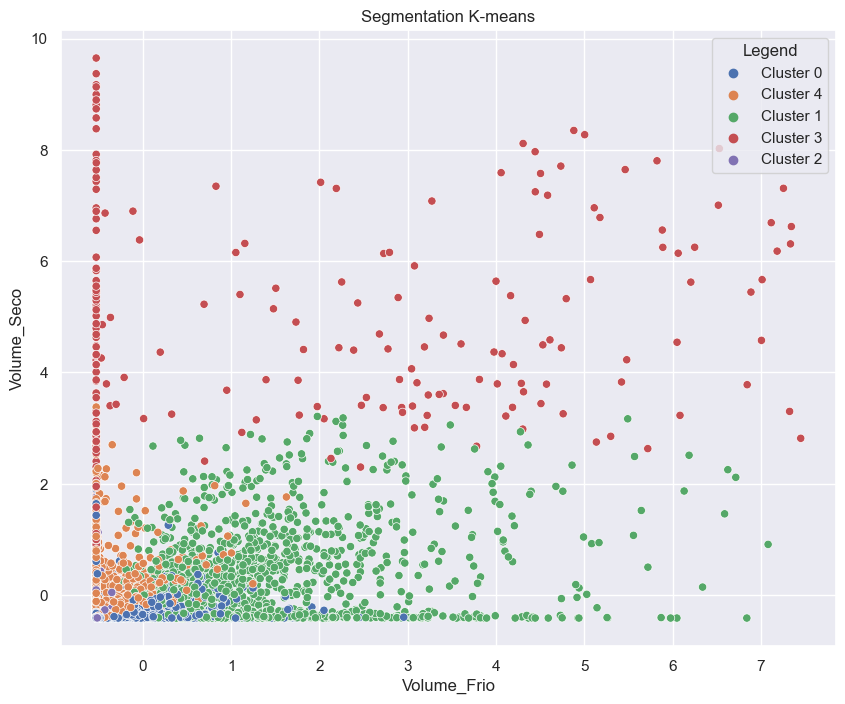

In [45]:
df_std1 = df_segm_kmeans
df_std1['Legend'] = df_segm_kmeans['Segment K-means'].map({0:'Cluster 0', 
           1:'Cluster 1',
           2:'Cluster 2',
           3:'Cluster 3',
           4:'Cluster 4',
           5:'Cluster 5'})

x_axis = df_std1['Volume_Frio']
y_axis = df_std1['Volume_Seco']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = df_std1['Legend'], palette = 'deep')
plt.title('Segmentation K-means')
plt.show()



In [46]:
pca = PCA()
pca.fit(df_std) 

PCA()

In [47]:
pca.explained_variance_ratio_

array([0.29973233, 0.16724673, 0.11969221, 0.09076366, 0.08397513,
       0.0541643 , 0.05244861, 0.04594223, 0.03957062, 0.02653252,
       0.01956596, 0.0003657 ])

Text(0, 0.5, 'Cumulative Explained Variance')

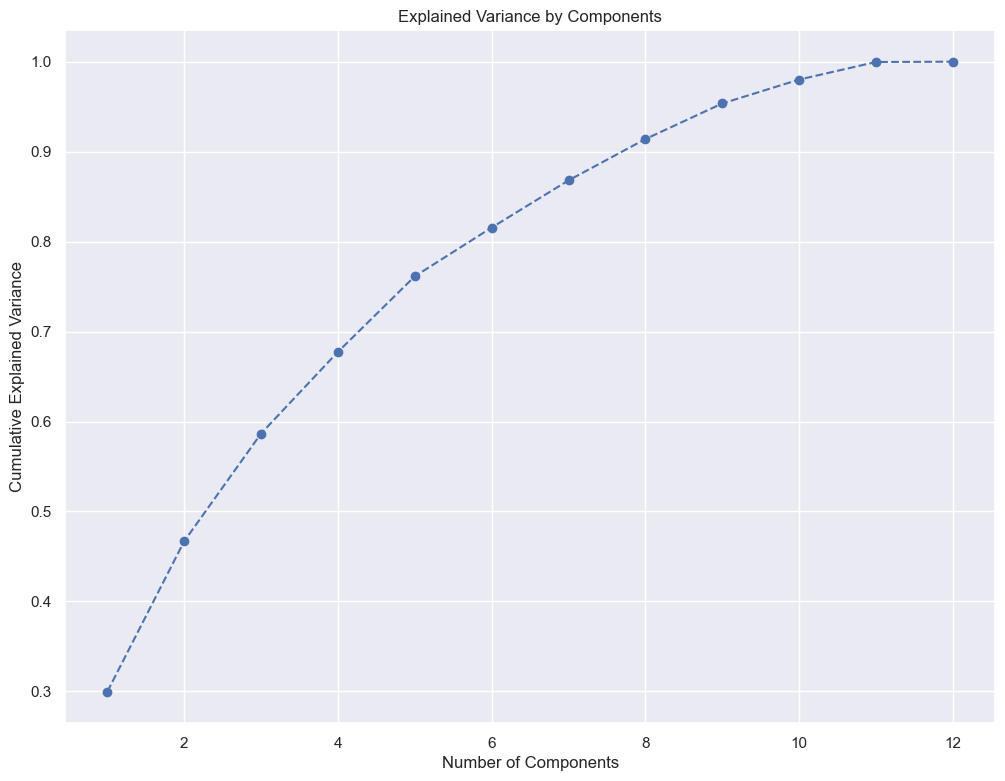

In [48]:
plt.figure(figsize = (12,9))
plt.plot(range(1,13), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [49]:
pca = PCA(n_components = 6)
pca.fit(df_std)
pca.components_

array([[ 3.47179788e-01,  4.44619128e-01,  5.65508956e-03,
        -4.20353721e-02, -1.14619235e-01, -1.03326564e-01,
        -6.62596721e-04,  3.95677916e-01,  3.55642677e-01,
         4.41140555e-01,  3.84839478e-01,  1.74406269e-01],
       [-2.11046836e-01,  3.35437305e-01,  3.43285080e-01,
         9.79904478e-02,  1.34122318e-01,  1.01668748e-01,
        -6.50649563e-02, -3.27584010e-01, -3.25969854e-01,
        -1.35003995e-01,  4.37466986e-01,  5.09670897e-01],
       [ 1.38934776e-01,  5.13717576e-02, -4.63906811e-01,
         2.01622626e-01,  5.90286917e-01,  6.00762797e-01,
        -1.99920461e-02,  1.35796351e-02,  4.42037961e-03,
         1.01228935e-01,  3.40866595e-02,  2.88001690e-02],
       [-1.39998904e-03, -1.20557948e-02, -3.44950258e-01,
         8.33089290e-01, -2.70767127e-01, -2.83754883e-01,
         4.26952059e-02, -6.11275340e-02, -5.39182958e-02,
         1.08725594e-02, -1.57283692e-02,  1.55435997e-01],
       [-9.46601679e-02,  3.78026115e-02, -9.1384096

In [50]:
df_pca_comp = pd.DataFrame(data = pca.components_,
                           columns = df_std.columns,
#              index = ['Component 1','Component 2','Component 3','Component 4'])
               index = ['Component 1','Component 2','Component 3','Component 4','Component 5','Component 6'])
df_pca_comp

,promotor,vol_medio_6,%UHT,%PO,%CONDENSADO,%CREME,%QUEIJO,SKU_COUNT,DATA_COUNT,Volume_Frio,Volume_Seco,ticket
Component 1,0.347180,0.444619,0.005655,-0.042035,-0.114619,-0.103327,-0.000663,0.395678,0.355643,0.441141,0.384839,0.174406
Component 2,-0.211047,0.335437,0.343285,0.097990,0.134122,0.101669,-0.065065,-0.327584,-0.325970,-0.135004,0.437467,0.509671
Component 3,0.138935,0.051372,-0.463907,0.201623,0.590287,0.600763,-0.019992,0.013580,0.004420,0.101229,0.034087,0.028800
Component 4,-0.001400,-0.012056,-0.344950,0.833089,-0.270767,-0.283755,0.042695,-0.061128,-0.053918,0.010873,-0.015728,0.155436
Component 5,-0.094660,0.037803,-0.091384,-0.101609,0.014538,-0.004933,0.980043,-0.047948,0.007285,0.002344,0.040901,0.078637
Component 6,-0.423593,0.030044,-0.627590,-0.407829,0.003032,-0.276624,-0.176682,-0.020546,0.107352,-0.022252,0.016896,0.372826


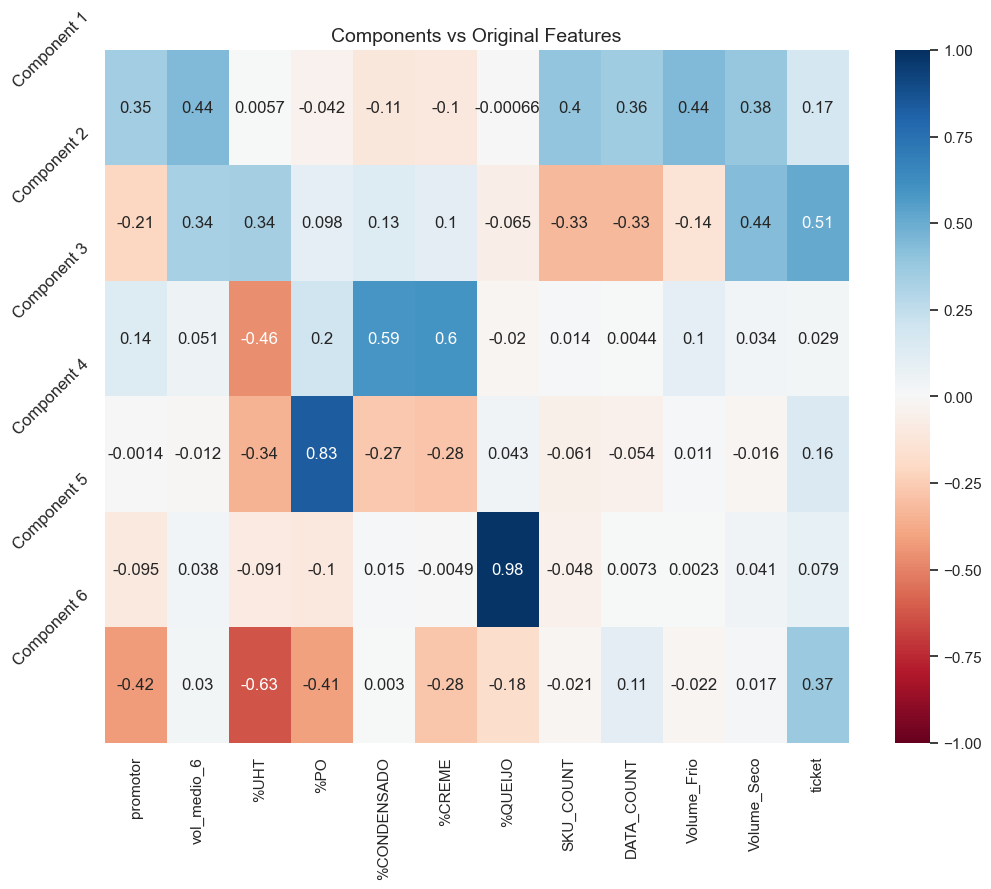

In [51]:
plt.figure(figsize=(12,9))
sns.heatmap(df_pca_comp,
            vmin = -1, 
            vmax = 1,
            cmap = 'RdBu',
            annot = True)
#plt.yticks([0, 1, 2, 3], 
#           ['Component 1','Component 2','Component 3','Component 4'],
#           rotation = 45,
#           fontsize = 12)
plt.yticks([0, 1, 2, 3, 4, 5], 
           ['Component 1','Component 2','Component 3','Component 4','Component 5','Component 6'],
           rotation = 45,
           fontsize = 12)
plt.title('Components vs Original Features',fontsize = 14)
plt.show()

In [52]:
pca.transform(df_std)
scores_pca = pca.transform(df_std)

In [53]:
wcss = []
for i in range(1,11):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

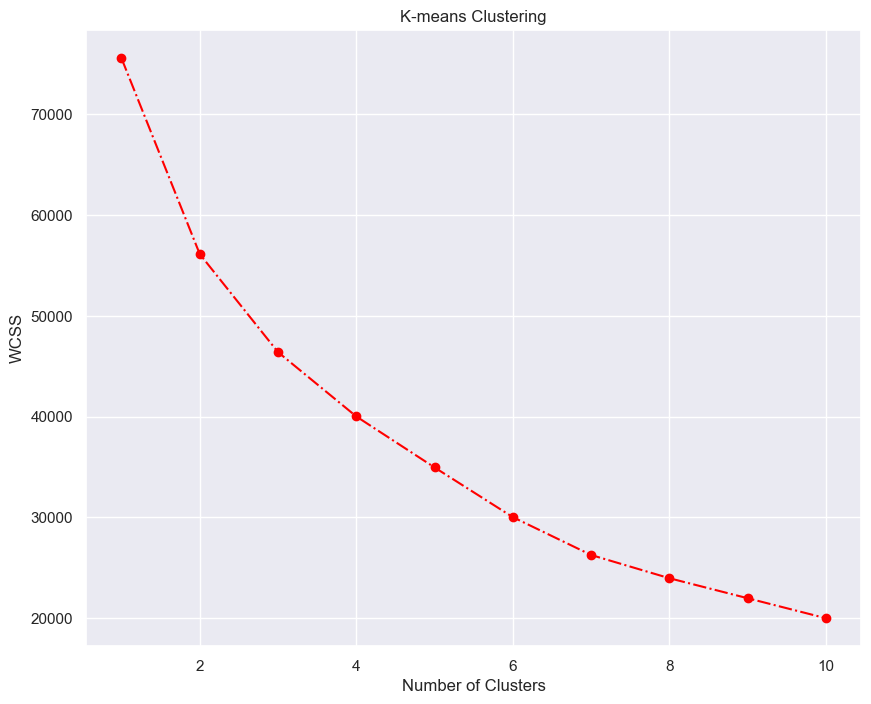

In [54]:
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '-.',color='red')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.show()

In [55]:
kmeans_pca = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=4, random_state=42)

In [56]:
df_segm_pca_kmeans = pd.concat([df_std.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
#df_segm_pca_kmeans.columns.values[-4: ] = ['Component 1','Component 2','Component 3','Component 4']
df_segm_pca_kmeans.columns.values[-6: ] = ['Component 1','Component 2','Component 3','Component 4','Component 5','Component 6']
df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_
df_segm_pca_kmeans.head()

,promotor,vol_medio_6,%UHT,%PO,%CONDENSADO,%CREME,%QUEIJO,SKU_COUNT,DATA_COUNT,Volume_Frio,Volume_Seco,ticket,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Segment K-means PCA
0,-0.525904,-0.441755,-0.291186,-0.280815,0.256878,-0.405553,5.353202,-0.146447,0.089571,-0.462087,-0.379245,-0.261523,-0.781420,-0.737791,-0.285155,0.111055,5.310846,-0.407089,2
1,-0.525904,-0.448555,0.017791,-0.419562,-0.640024,-0.608381,-0.134005,-0.697215,-0.439595,-0.438022,-0.392103,-0.250091,-1.047927,-0.081623,-1.005887,0.019534,-0.070306,0.436280,2
2,-0.525904,-0.438460,0.905043,-0.333744,-0.493178,-0.416968,-0.134005,-0.667710,-0.395498,-0.493633,-0.368785,-0.244853,-1.065926,0.270247,-1.202081,-0.313565,-0.158392,-0.200037,2
3,-0.525904,-0.188158,-1.382386,-0.349259,-0.579639,-0.538775,-0.099950,0.128937,0.662834,0.926839,-0.385855,-0.202009,0.374688,-1.242103,-0.096150,0.435580,0.069912,1.358115,2
4,-0.525904,-0.451459,-1.573485,-0.419562,-0.640024,-0.612956,-0.134005,-1.061116,-0.704178,-0.529746,-0.375906,-0.226439,-1.325934,-0.392346,-0.284744,0.608713,0.092852,1.426334,2


In [57]:
# We calculate the means by segments.
df_segm_pca_kmeans_freq = df_segm_pca_kmeans.groupby(['Segment K-means PCA']).mean()
df_segm_pca_kmeans_freq

,promotor,vol_medio_6,%UHT,%PO,%CONDENSADO,%CREME,%QUEIJO,SKU_COUNT,DATA_COUNT,Volume_Frio,Volume_Seco,ticket,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6
Segment K-means PCA,,,,,,,,,,,,,,,,,,
0,1.480630,0.600751,-0.325383,-0.137687,-0.288593,-0.244515,0.003633,1.441288,1.294913,1.245465,0.321791,-0.021568,2.543753,-1.232570,0.204160,-0.016895,-0.118439,-0.203573
1,-0.232451,-0.370626,-0.724748,1.030610,1.654744,1.518067,-0.091861,-0.769629,-0.568833,-0.468497,-0.296906,-0.124986,-1.488931,0.466387,2.309171,0.288519,-0.094267,-0.363267
2,-0.403436,-0.296006,0.178035,-0.138549,-0.190263,-0.177742,0.017911,-0.294488,-0.281158,-0.349915,-0.239046,-0.123218,-0.709042,0.056621,-0.453593,-0.056023,0.032257,0.085873
3,0.584743,4.588836,0.800169,0.203382,0.004633,-0.057378,-0.094661,0.346748,0.224774,1.847453,4.825020,3.669598,5.773717,5.256223,0.419809,0.329530,0.407164,0.763203


C:\Users\josesugahara\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


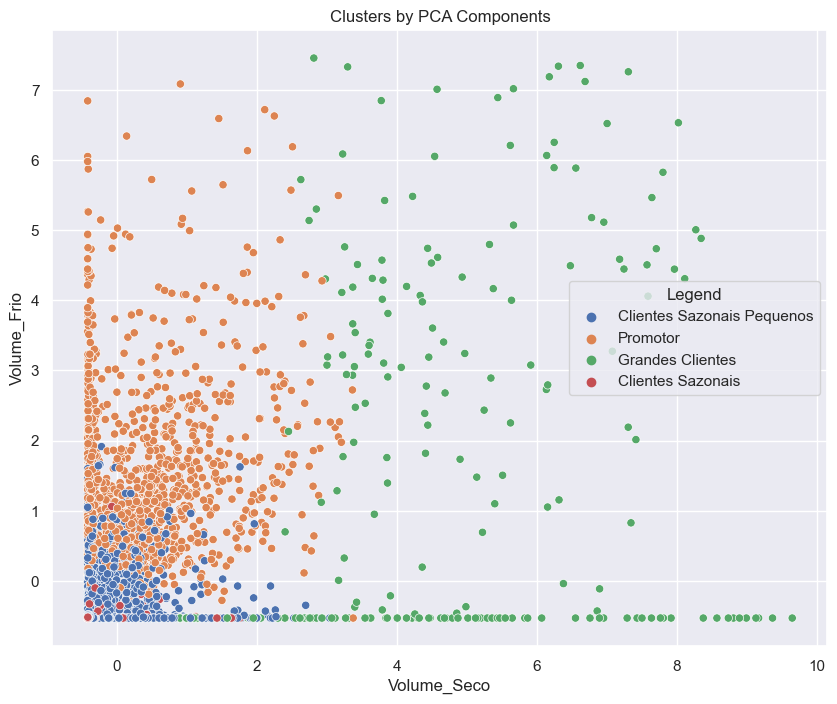

In [59]:
df_segm_pca_kmeans['Legend'] = df_segm_pca_kmeans['Segment K-means PCA'].map({0:'Promotor', 
           1:'Clientes Sazonais',
           2:'Clientes Sazonais Pequenos',
           3:'Grandes Clientes'})

x_axis = df_segm_pca_kmeans['Volume_Seco']
y_axis = df_segm_pca_kmeans['Volume_Frio']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_pca_kmeans['Legend'], palette = "deep")
plt.title('Clusters by PCA Components')
plt.show()

C:\Users\josesugahara\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


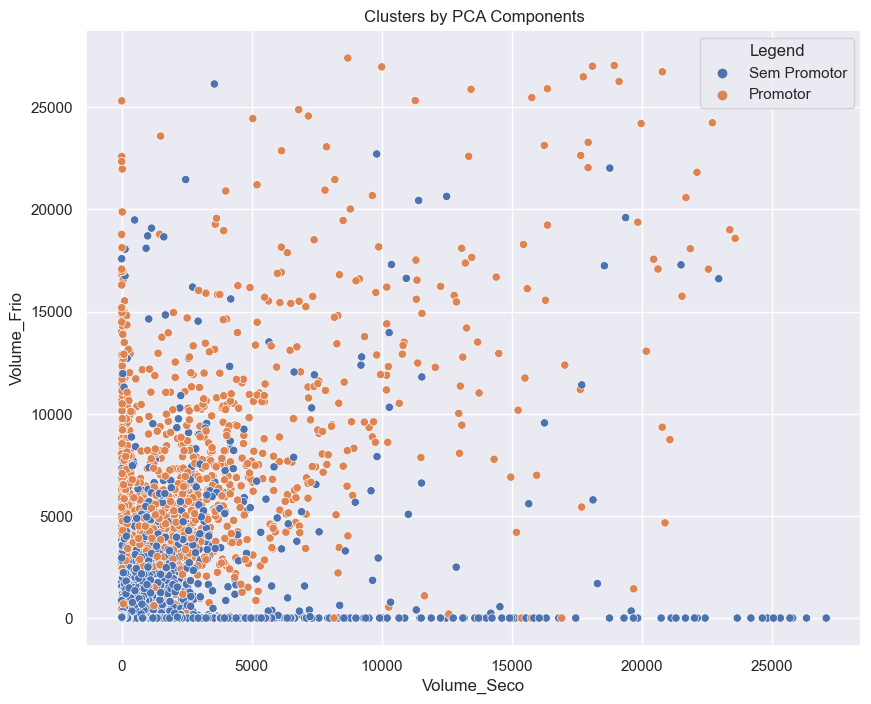

In [63]:
df_temp = df_end
df_temp['Legend'] = df_temp['promotor'].map({0:'Sem Promotor', 
           1:'Promotor'})

#df_temp['Legend'] = df_temp['Segment K-means PCA'].map({0:'Grandes clientes', 
#           1:'Clientes Sazonais Pequenos',
#           2:'Promotor',
#           3:'Clientes Sazonais'})

x_axis = df_temp['Volume_Seco']
y_axis = df_temp['Volume_Frio']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = df_temp['Legend'], palette = "deep")
plt.title('Clusters by PCA Components')
plt.show()

C:\Users\josesugahara\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


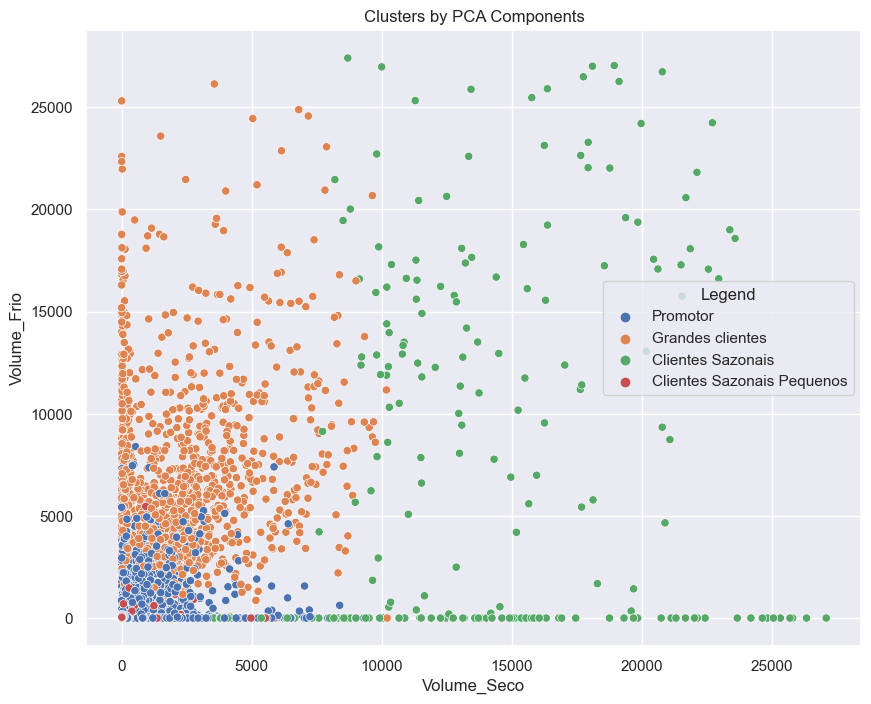

In [64]:
#df_temp = df_end
#df_temp['Legend'] = df_temp['promotor'].map({0:'Sem Promotor', 
#           1:'Promotor'})

df_temp['Legend'] = df_temp['Segment K-means PCA'].map({0:'Grandes clientes', 
           1:'Clientes Sazonais Pequenos',
           2:'Promotor',
           3:'Clientes Sazonais'})

x_axis = df_temp['Volume_Seco']
y_axis = df_temp['Volume_Frio']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = df_temp['Legend'], palette = "deep")
plt.title('Clusters by PCA Components')
plt.show()

In [62]:
df_end = pd.concat([df_stage.reset_index(),df_segm_pca_kmeans["Segment K-means PCA"]],axis=1)
df_end.to_excel('Extracao Andrey.xlsx')

In [1]:
from auto_ts import auto_timeseries

ModuleNotFoundError: No module named 'fbprophet'